AIM - We need to analyze parameters which can cause dementia and also to create a prediction model to predict it for individuals

Dementia means loss of memory, language and othere thinking abilities.
I am creating a path so that the datasets can be loaded from this path.

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Load the datasets

In [2]:
data = pd.read_csv("G:/Raghu/Nuclei Technologies/Projects/Project 4/Oasis_Longitudinal.csv")
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,CDR
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,1987,0.696,0.883,0.0
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,2004,0.681,0.876,0.0
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,1678,0.736,1.046,0.5
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,1738,0.713,1.010,0.5
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,1698,0.701,1.034,0.5


In [3]:
data.shape

(373, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  eTIV        373 non-null    int64  
 12  nWBV        373 non-null    float64
 13  ASF         373 non-null    float64
 14  CDR         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [5]:
data.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,CDR
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,1488.128686,0.729568,1.195461,0.290885
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,176.139286,0.037135,0.138092,0.374557
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,1106.000000,0.644000,0.876000,0.000000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,1357.000000,0.700000,1.099000,0.000000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,1470.000000,0.729000,1.194000,0.000000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,1597.000000,0.756000,1.293000,0.500000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2004.000000,0.837000,1.587000,2.000000


We We will drop the Hand column in the datasets as all are right handed and will not affect the prediction. 

We will also remove Visit, Subject ID, Group, MR.Delay and MRI ID from Training dataset as it will not affect the prediction. 

In [6]:
data = data.drop(['Visit','Subject ID','MRI ID','Group', 'MR Delay', 'Hand'],axis=1)

In [7]:
data.head()

,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,CDR
0,M,87,14,2.0,27.0,1987,0.696,0.883,0.0
1,M,88,14,2.0,30.0,2004,0.681,0.876,0.0
2,M,75,12,NaN,23.0,1678,0.736,1.046,0.5
3,M,76,12,NaN,28.0,1738,0.713,1.010,0.5
4,M,80,12,NaN,22.0,1698,0.701,1.034,0.5


In [8]:
data.isnull().sum()

M/F      0
Age      0
EDUC     0
SES     19
MMSE     2
eTIV     0
nWBV     0
ASF      0
CDR      0
dtype: int64

We see that there are 19 missing vales in SES (Socioeconomic status) and 2 in MMSE (Mini-Mental State Examination) so we will replace these missing values and we have to fill these with Mean values so that analysis becomes easier.

In [9]:
# fill missing value with medium
data['SES'].fillna(data['SES'].mean(), inplace=True)

In [10]:
data['MMSE'].fillna(data['MMSE'].mean(), inplace=True)

In [11]:
data.isnull().sum()

M/F     0
Age     0
EDUC    0
SES     0
MMSE    0
eTIV    0
nWBV    0
ASF     0
CDR     0
dtype: int64

Data Exploration

Clinical Dementia Ratings

In [12]:
data["CDR"].value_counts()

0.0    206
0.5    123
1.0     41
2.0      3
Name: CDR, dtype: int64

The CDR is or 
0 = Normal
0.5 = Very Mild Dementia
1 = Mild Dementia
2 = Moderate Dementia
3 = Severe Dementia

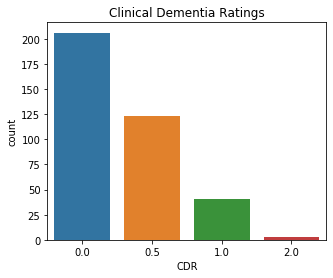

In [13]:
plt.figure(figsize=(5,4))
sns.countplot(data['CDR'])

plt.title('Clinical Dementia Ratings')
plt.show()

From the above graph we see that there are more people who are normal and some with Very Mild Dementia and Mild Dementia and rare cases with Moderate and Severe Dementia.

In [14]:
data["CDR"].value_counts(normalize = True)*100

0.0    55.227882
0.5    32.975871
1.0    10.991957
2.0     0.804290
Name: CDR, dtype: float64

The percentage of CDR

Now we will check the correlation between the variables

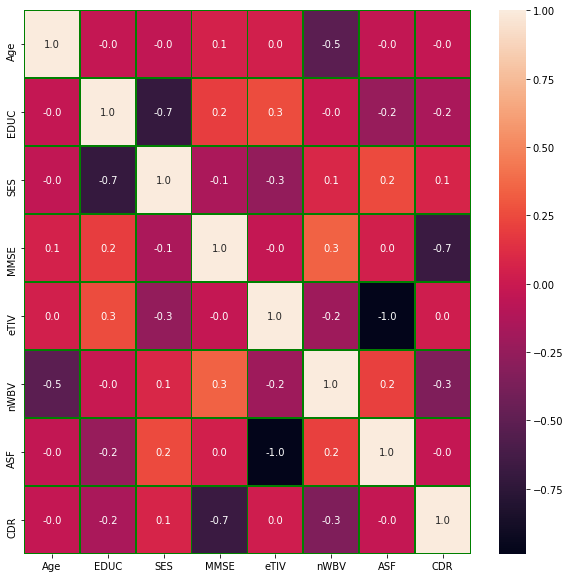

In [15]:
#Corelation between the variables

f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidths=0.5,linecolor="green",fmt=".1f",ax=ax)
plt.show()

1. AGE

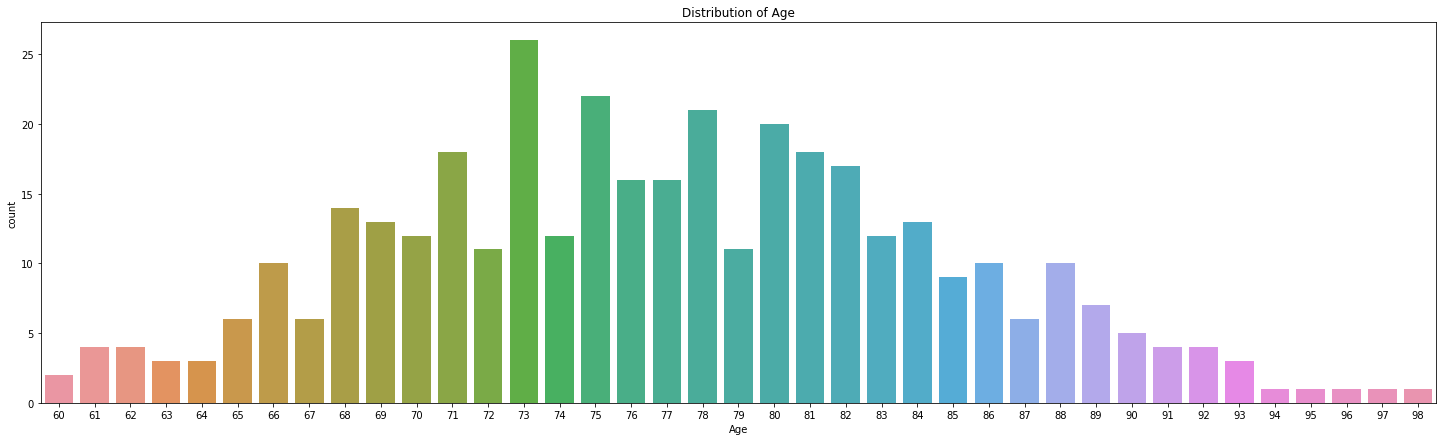

In [16]:
plt.figure(figsize=(25,7))
sns.countplot('Age',data=data)

plt.title('Distribution of Age')
plt.show()

The Age bar here is from 60 to 100

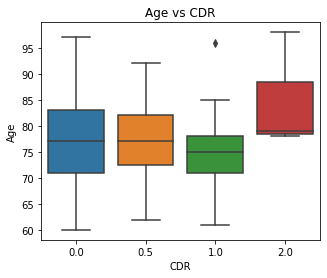

In [17]:
plt.figure(figsize=(5,4))
sns.boxplot('CDR','Age',data=data)

plt.title('Age vs CDR')
plt.show()

Age does not affect much in the effect or diagnosis of Dementia.

2. Gender 

In [18]:
data["M/F"].value_counts()

F    213
M    160
Name: M/F, dtype: int64

Female - 213

Male - 160

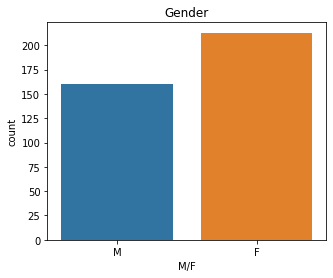

In [19]:
plt.figure(figsize=(5,4))
sns.countplot(data['M/F'])

plt.title('Gender')
plt.show()

The distribution of Male and Female who has Alzheimer disease or symptoms the above graph is the ratio of Male and Female with respect to the symptoms.  

3. Years of Education

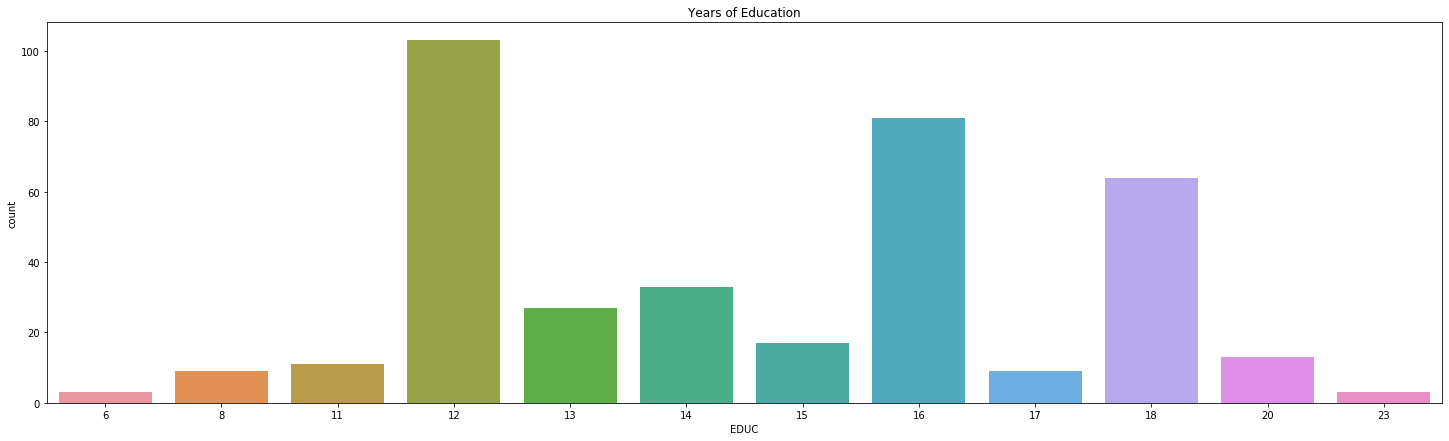

In [20]:
plt.figure(figsize=(25,7))
sns.countplot('EDUC',data=data)

plt.title('Years of Education')
plt.show()

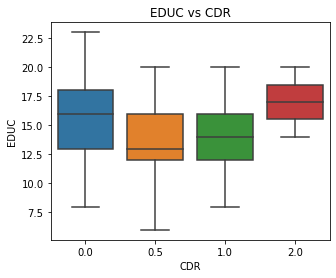

In [21]:
plt.figure(figsize=(5,4))
sns.boxplot('CDR','EDUC',data=data)

plt.title('EDUC vs CDR')
plt.show()

Years of Education does not have much of an effect on Dementia diagnosis. From the correlation it is also evident that CDR is opposit of Education as it is in negative -0.2

4. Socioeconomic Status

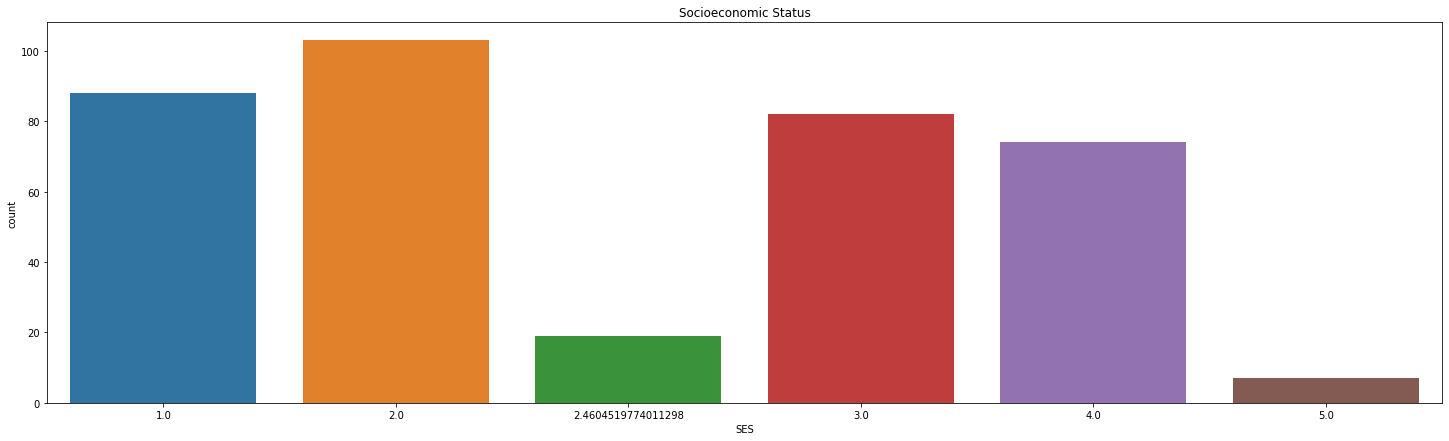

In [22]:
plt.figure(figsize=(25,7))
sns.countplot('SES',data=data)

plt.title('Socioeconomic Status')
plt.show()

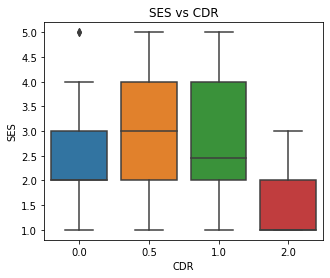

In [23]:
plt.figure(figsize=(5,4))
sns.boxplot('CDR','SES',data=data)

plt.title('SES vs CDR')
plt.show()

Socioeconomic Status also has less affect as as is also from the Correlation with -0.05

5. Normalized whole-brain volume

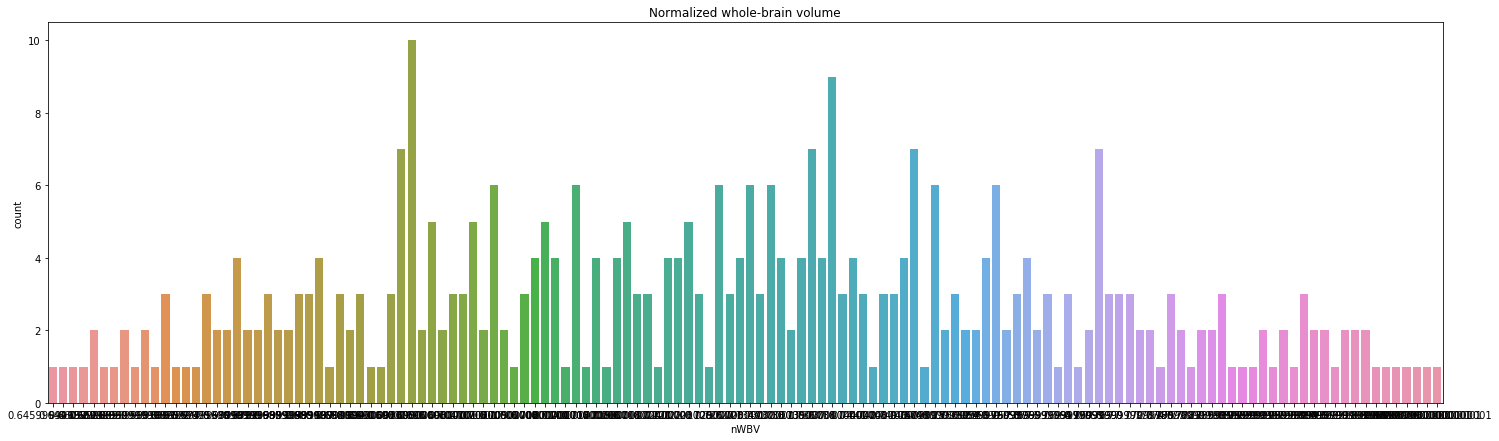

In [24]:
plt.figure(figsize=(25,7))
sns.countplot('nWBV',data=data)

plt.title('Normalized whole-brain volume')
plt.show()

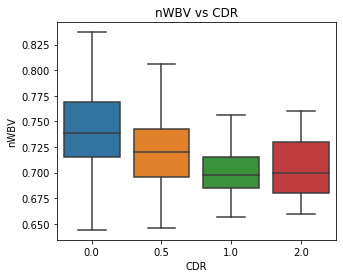

In [25]:
plt.figure(figsize=(5,4))
sns.boxplot('CDR','nWBV',data=data)

plt.title('nWBV vs CDR')
plt.show()

There is not much effect of NWBV on CDR

6. Mini-Mental State Examination

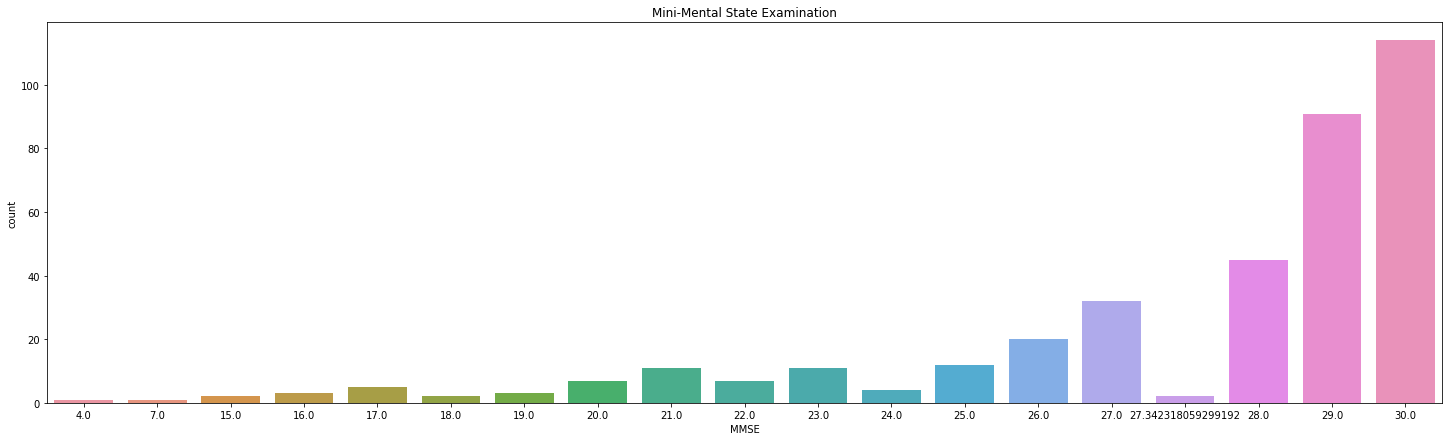

In [26]:
plt.figure(figsize=(25,7))
sns.countplot('MMSE',data=data)

plt.title('Mini-Mental State Examination')
plt.show()

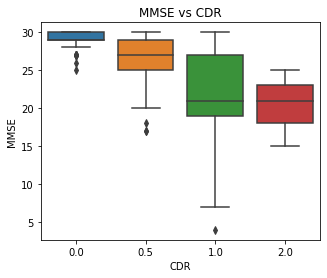

In [27]:
plt.figure(figsize=(5,4))
sns.boxplot('CDR','MMSE',data=data)

plt.title('MMSE vs CDR')
plt.show()

MMSE has a linear relationship with the CDR as higher the MMSe there are more patients with no symptons

7. Estimated Total Intracranial Volume

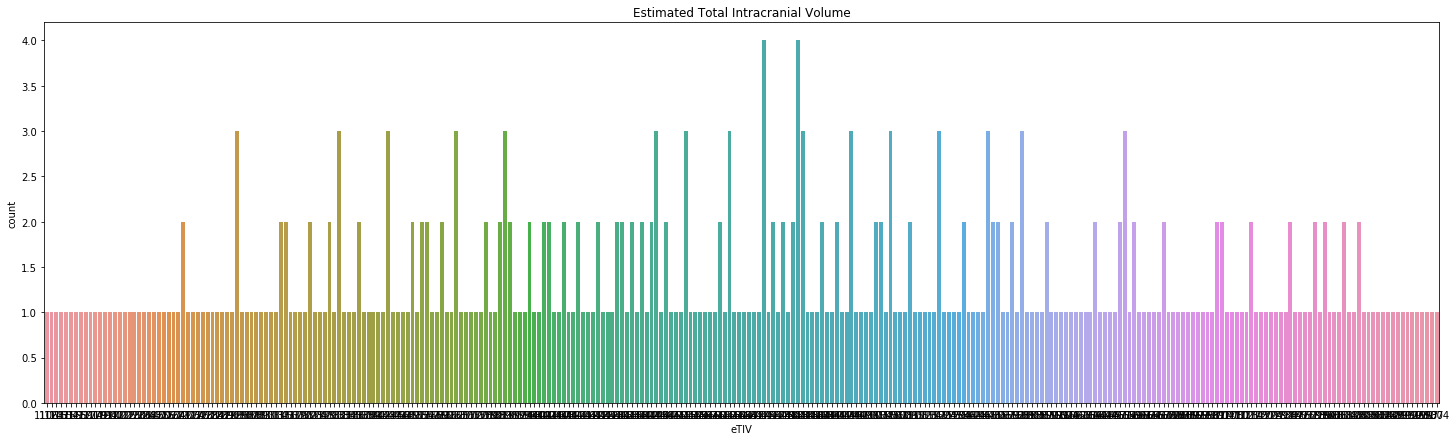

In [28]:
plt.figure(figsize=(25,7))
sns.countplot('eTIV',data=data)

plt.title('Estimated Total Intracranial Volume')
plt.show()

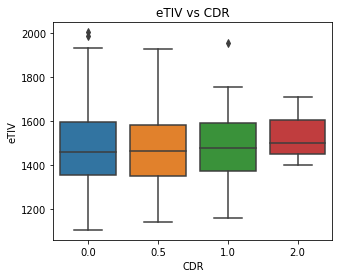

In [29]:
plt.figure(figsize=(5,4))
sns.boxplot('CDR','eTIV',data=data)

plt.title('eTIV vs CDR')
plt.show()

There is no much effect of eTIV on CDR

8. Atlas scaling factor

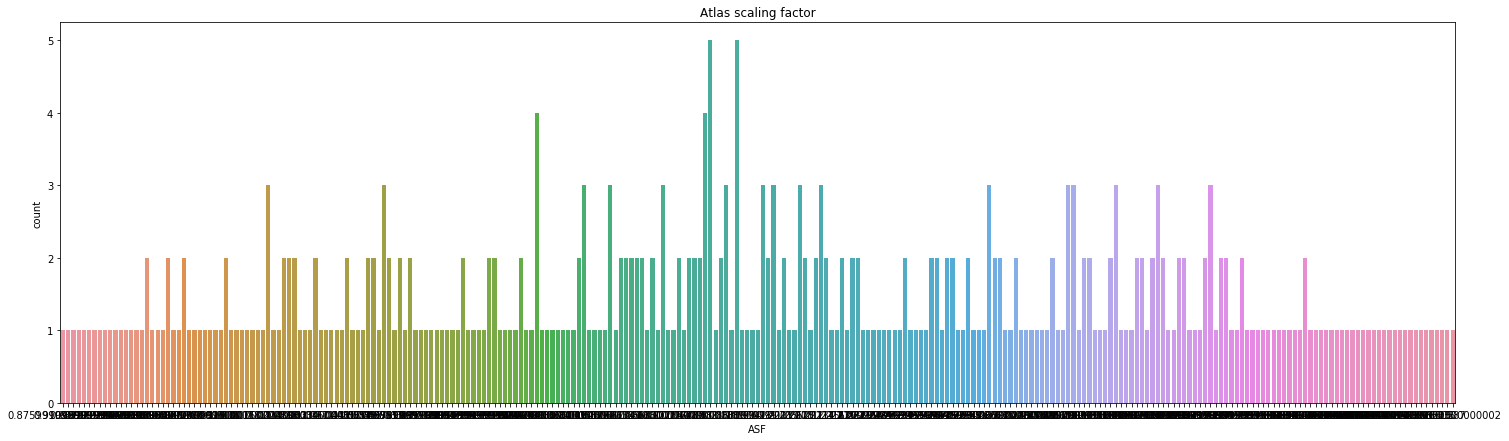

In [30]:
plt.figure(figsize=(25,7))
sns.countplot('ASF',data=data)

plt.title('Atlas scaling factor')
plt.show()

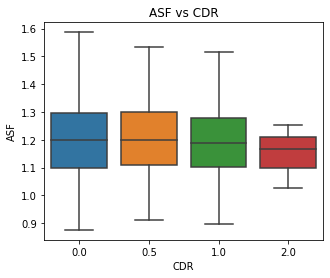

In [31]:
plt.figure(figsize=(5,4))
sns.boxplot('CDR','ASF',data=data)

plt.title('ASF vs CDR')
plt.show()

ASF has no affect on the CDR.

Now we need to Split the data so that we can test the model datasets and we
will Randomly split the data.

In [32]:
data.columns

Index(['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF', 'CDR'], dtype='object')

In [33]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['M/F','SES', 'MMSE', 'nWBV', 'ASF', 'CDR']
#Encoder will convert all our categorical variables into numeric by encoding the categories
le = LabelEncoder() 
for i in var_mod:
    data[i] = le.fit_transform(data[i].astype(str))

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   M/F     373 non-null    int32
 1   Age     373 non-null    int64
 2   EDUC    373 non-null    int64
 3   SES     373 non-null    int32
 4   MMSE    373 non-null    int32
 5   eTIV    373 non-null    int64
 6   nWBV    373 non-null    int32
 7   ASF     373 non-null    int32
 8   CDR     373 non-null    int32
dtypes: int32(6), int64(3)
memory usage: 17.6 KB


In [35]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [36]:
train,test=train_test_split(data,train_size=0.7,test_size=0.3)
train.size,test.size

(2349, 1008)

In [37]:
train.shape

(261, 9)

In [38]:
test.shape

(112, 9)

In [39]:
test = test.drop(['CDR'], axis=1)

In [40]:
test.head()

,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
156,0,70,14,3,15,1524,117,98
71,0,75,13,4,15,1349,110,196
64,0,82,16,0,16,1460,34,135
124,1,79,14,3,11,1308,44,221
271,0,65,12,1,16,1340,89,202


In [41]:
X= train[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
y= train[['CDR']]

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=31)

In [43]:
features=['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

RF= RandomForestClassifier(n_estimators=100)

# Fitting the model on our trained dataset.
RF.fit(X_train,y_train.values.ravel())

# Making Predictions
y_pred = RF.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix

array([[25,  5,  0,  0],
       [ 5, 12,  1,  0],
       [ 1,  3,  0,  0],
       [ 0,  1,  0,  0]], dtype=int64)

In [45]:
accuracy_score(y_test, y_pred)

0.6981132075471698

In [46]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train.values.ravel())
y_pred = DT.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[24,  6,  0,  0],
       [ 6, 11,  1,  0],
       [ 1,  3,  0,  0],
       [ 0,  1,  0,  0]], dtype=int64)

In [47]:
accuracy_score(y_test, y_pred)

0.660377358490566

In [49]:
from xgboost import XGBClassifier

xgboost = XGBClassifier(subsample = 0.7, max_depth = 9)
xgboost.fit(X_train, y_train.values.ravel())
y_pred = xgboost.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix

array([[25,  5,  0,  0],
       [ 3, 14,  1,  0],
       [ 1,  3,  0,  0],
       [ 0,  0,  1,  0]], dtype=int64)

In [50]:
accuracy_score(y_test, y_pred)

0.7358490566037735

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier(random_state=0)
gradient.fit(X_train, y_train.values.ravel())
y_pred = gradient.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix

array([[25,  5,  0,  0],
       [ 3, 15,  0,  0],
       [ 1,  3,  0,  0],
       [ 0,  0,  1,  0]], dtype=int64)

In [53]:
accuracy_score(y_test, y_pred)

0.7547169811320755

In [54]:
from sklearn.svm import SVC, LinearSVC

svc = SVC()
svc.fit(X_train, y_train.values.ravel())
Y_pred = svc.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix

array([[25,  5,  0,  0],
       [ 3, 15,  0,  0],
       [ 1,  3,  0,  0],
       [ 0,  0,  1,  0]], dtype=int64)

In [55]:
accuracy_score(y_test, y_pred)

0.7547169811320755

From the above we see that the best results we have got is from Gradient Boosting and Support Vector Machine 